In [57]:
# anchor的理解和实现

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

# feature map 的尺寸
size_Y = 14
size_X = 14
# 原始图片到feature map 的缩放比  
rpn_stride = 16          ## 原始图片尺寸 16 * 8 = 128
scales = [4, 8, 16]      # anchor的3种尺寸
ratios = [0.5, 1, 2]    # anchor的3种长宽比例

In [58]:
def anchor_gen(size_X, size_Y, rpn_stride, scales, ratios):
    scales, ratios = np.meshgrid(scales, ratios)
    scales, ratios = scales.flatten(), ratios.flatten()

    scalesY = scales * np.sqrt(ratios)
    scalesX = scales / np.sqrt(ratios)
    # 原始图片上的点
    shiftX = np.arange(0, size_X) * rpn_stride
    shiftY = np.arange(0, size_Y) * rpn_stride
    
    shiftX, shiftY = np.meshgrid(shiftX, shiftY)

    centerX, anchorX = np.meshgrid(shiftX, scalesX)
    centerY, anchorY = np.meshgrid(shiftY, scalesY)

    anchor_center = np.stack([centerY, centerX], axis=2).reshape(-1, 2)
    anchor_size = np.stack([anchorY, anchorX], axis=2).reshape(-1, 2)

    boxes = np.concatenate([anchor_center - 0.5 * anchor_size,
        anchor_center + 0.5 * anchor_size ], axis=1)
    return boxes

In [59]:
anchors = anchor_gen(size_X, size_Y, rpn_stride, scales, ratios)

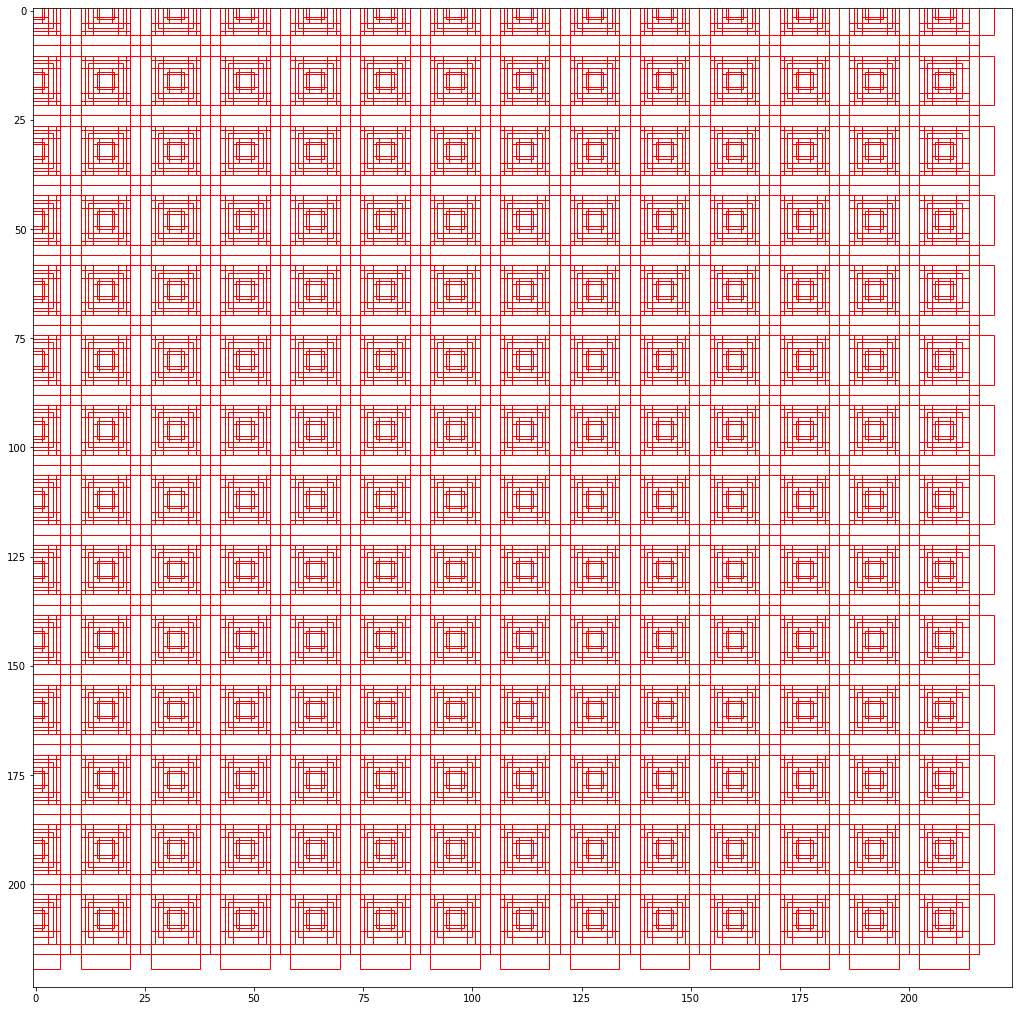

In [60]:
plt.figure(figsize=[18, 18])
img = np.ones((224, 224, 3))
plt.imshow(img)
Axs = plt.gca() ## get current Axs

for i in range(anchors.shape[0]):
    box = anchors[i]
    rec = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], edgecolor="r", facecolor="none")
    Axs.add_patch(rec)